In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


# Any results you write to the current directory are saved as output.
print("Hello world!")
train_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/train.csv')
test_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/test.csv')

def data_checkup(data):
    print(data.shape)
    print(data.columns)
    print(data.describe)
    
data_checkup(train_df)
print("Done")

Hello world!
(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7      

In [3]:
#print(train_df['label'])
#Output has 10 labels so divide the
train_copy = train_df.copy()
#lambda(x:x.label =0 ,)
#print(train_df.head())
train_copy = pd.get_dummies(train_copy, columns=['label'])

#train_copy = pd.get_dummies(train_copy[])
print("Done")
print(train_df.head())
print(train_copy.head())


Done
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0    

In [4]:
train_copy.apply(lambda x : sum(x.isnull()))

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
label_0     0
label_1     0
label_2     0
label_3     0
label_4     0
label_5     0
label_6     0
label_7     0
label_8     0
label_9     0
Length: 794, dtype: int64

In [5]:
counts = pd.value_counts(train_df['label'])
print(counts)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [6]:
Y = train_df['label']
train_copy2 = train_df.copy()
del train_copy2['label']
X = train_copy2

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X,Y)
from __future__ import division
y_pred_train = clf.predict(X)
y_pred_test = clf.predict(test_df)
print(confusion_matrix(Y, y_pred_train))

[[4132    0    0    0    0    0    0    0    0    0]
 [   0 4683    0    0    0    0    0    1    0    0]
 [   0    0 4174    0    0    0    0    0    3    0]
 [   0    1    1 4347    0    1    0    0    1    0]
 [   1    1    0    0 4069    0    0    0    1    0]
 [   1    0    0    3    0 3791    0    0    0    0]
 [   0    1    0    0    0    0 4135    0    1    0]
 [   0    1    2    1    0    0    0 4396    0    1]
 [   0    1    1    2    1    1    0    0 4056    1]
 [   1    1    0    4    2    2    0    5    0 4173]]


In [9]:
y_pred_test = pd.DataFrame(y_pred_test)

In [11]:
y_pred_test.to_csv("sample_submission.csv")

# Tensor Flow

TensorFlow separates the definition of computation from the execution of the computation. In practice, this means that you need to:

1. Create a computational graph

2. Run a session to execute the operations in the graph

More efficient computation is a major benefit of this approach. The graph structure facilitates computation across multiple CPUs or GPUs by allowing you to direct the computation of different parts of the graph to specific CPUs / GPUs.


Ref: https://www.kaggle.com/ndalziel/beginner-s-guide-to-classification-tensorflow

In [1]:
import tensorflow as tf

#step1 Computational graph

op1 = tf.add(3,4)
op2 = tf.multiply(op1,5)

#step2 Run a session to execute the operations on the graph

with tf.Session() as sess:
    print(sess.run(op2))

35


In [5]:
#If we want to define the graph in more general terms and pass in variables, we need to create placeholders...

# Step0 create placeholders

X = tf.placeholder(tf.int32, name="X")
Y = tf.placeholder(tf.int32, name="Y")
Z = tf.placeholder(tf.int32, name="Z")

#step1 Create computational graph
op1 = tf.add(X,Y)
op2 = tf.multiply(op1,Z)

# Run a session to execute operations in the graph

var1 = 3; var2 = 4; var3 = 5

with tf.Session()  as sess:
    result = sess.run(op2, feed_dict= {X:var1, Y:var2, Z:var3})
    print(result)

35


In [6]:
#

# IMAGE RECOGNITION USING TENSORFLOW

In [7]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [8]:
train_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/train.csv')
test_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/test.csv')

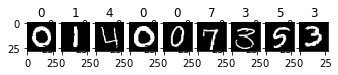

In [13]:
X_traindev = train_df.loc[:, "pixel0" : "pixel783"]
Y_traindev = train_df.loc[:,"label"]

%matplotlib inline
for n in range(1, 10):
    plt.subplot(1, 10 ,n)
    plt.imshow(X_traindev.iloc[n].values.reshape((28,28)), cmap='gray')
    plt.title(Y_traindev.iloc[n])

In [15]:
#create training data set 
X_train = X_traindev[:40000].T.values
Y_train = Y_traindev[:40000]

Y_train = pd.get_dummies(Y_train).T.values

#create cross validation set
X_dev = X_traindev[40000:42000].T.values
Y_dev = Y_traindev[40000:42000]
Y_dev = pd.get_dummies(Y_dev).T.values

#
X_test = test_df.T.values

print("Number of training examples: " + str(X_train.shape[1]))
print("Number of cross-validation examples = " + str(X_dev.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(Y_dev.shape))
print ("X_test shape: " + str(X_test.shape))

Number of training examples: 40000
Number of cross-validation examples = 2000
X_train shape: (784, 40000)
Y_train shape: (10, 40000)
X_dev shape: (784, 2000)
Y_dev shape: (10, 2000)
X_test shape: (784, 28000)


In [ ]:
#

Setting up the network

We need to start off by initializing variables, creating placeholders and implementing the computation graph. At thre core of the function below are the feed-foward equations:

Z(i) = W(i)*A(i-1) + b(i)
A(i) = activation_function * Z(i)

In [30]:
def create_graph(X_train,Y_train):
    #setup
    ops.reset_default_graph()                         # reset computation graph

    # initialize variables
    (n_x, training_examples) = X_train.shape                          
    n_y = Y_train.shape[0]                            
    costs = []

    # create placeholders
    X = tf.placeholder(tf.float32, shape=(n_x, None),name = "X")
    Y = tf.placeholder(tf.float32, shape=(n_y, None),name = "Y")
    
    # initialize weights
    W1 = tf.get_variable("W1", [32,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W2 = tf.get_variable("W2", [16,32], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W3 = tf.get_variable("W3", [10,16], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    
    # initialize biases
    b1 = tf.get_variable("b1", [32,1], initializer = tf.zeros_initializer())
    b2 = tf.get_variable("b2", [16,1], initializer = tf.zeros_initializer())
    b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())

    # create the graph for forward propagation
    Z1 = tf.add(tf.matmul(W1,X),b1)                                             
    A1 = tf.nn.relu(Z1)                                                         
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                            
    A2 = tf.nn.relu(Z2)                                                         
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    return X, Y, Z3, training_examples

#

Next, we'll specifiy how the model is optimized by choosing the optimization algorithm and the cost (or loss) function. The Adam optimization algorithm works well across a wide range of neural network architectures. (Adam essentially combined two other successful algorithms - gradient descent with momentum, and RMSProp.) For the loss function, 'softmax_cross_entropy_with_logits' is a good choice for multi-class classification.

In [31]:
def define_optimization(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    return optimizer, cost

Before we train the network, we need a function that creates randomized batches of training data so that we can implement mini-batch optimization (which will lead to faster optimization convergence)...

In [32]:
def random_mini_batches(X,Y, mini_batch_size = 64, seed = 0):
    #
    m = X.shape[1]
    mini_batches = []
    np.random.seed(seed)
    
    #step 1 Shuffile X,Y
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0], m))
    
    #Step2: Partition (Shuffled_X, Shuffled_Y) minus the end case
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k* mini_batch_size : k*mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k* mini_batch_size : k*mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    #Handling the end case (last mini-batch < mini_batch_size)
    if m% mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches

Training the network:

Now, we'll open the TensorFlow session and execute the computation graph. Note that 1 epoch (or iteration) corresponds to a complete pass through the training set. For each epoch, we execute forward-prop and back-prop on all of the mini-batches. We'll print out the train and dev (or corss-validation) accuracy for each epoch, so can diagnose how well the neural network is performing...

In [33]:
def train_network(X_train, Y_train, X_dev, Y_dev, X_test, num_epochs, minibatch_size=64, print_n_epochs =1):
    #
    tf. set_random_seed(1)
    X,Y,Z_final, training_examples = create_graph(X_train, Y_train)
    optimizer, cost = define_optimization(Z_final, Y)
    init = tf.global_variables_initializer()   #set up variables for initialization
    
    with tf.Session() as sess:
        sess.run(init) # initializes variables we created
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(training_examples /minibatch_size)
            minibatches = random_mini_batches(X_train, Y_train)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _, minibatch_cost = sess.run([optimizer, cost], 
                                            feed_dict ={X:minibatch_X, Y:minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches
                
            print("cost after epoch %i: %.3f"%(epoch+1, epoch_cost), end = "")
            correct_prediction = tf.equal(tf.argmax(Z_final), tf.argmax(Y))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print("    Train Accuracy: %.3f"%(accuracy.eval({X:X_train, Y:Y_train})), end="")
            print("    Dev Accuracy: %.3f"%(accuracy.eval({X:X_dev, Y:Y_dev})))
            
        print("Network has been trained")
        predict = tf.argmax(Z_final).eval({X: X_test})
        probs = tf.nn.softmax(Z_final).eval({X:X_test})
        return predict, probs

In [34]:
Y_predict, Y_probs = train_network(X_train, Y_train, X_dev, Y_dev, X_test, num_epochs=20)

cost after epoch 1: 2.947    Train Accuracy: 0.626    Dev Accuracy: 0.628
cost after epoch 2: 0.901    Train Accuracy: 0.747    Dev Accuracy: 0.747
cost after epoch 3: 0.663    Train Accuracy: 0.846    Dev Accuracy: 0.844
cost after epoch 4: 0.527    Train Accuracy: 0.876    Dev Accuracy: 0.863
cost after epoch 5: 0.441    Train Accuracy: 0.875    Dev Accuracy: 0.867
cost after epoch 6: 0.372    Train Accuracy: 0.900    Dev Accuracy: 0.895
cost after epoch 7: 0.328    Train Accuracy: 0.907    Dev Accuracy: 0.898
cost after epoch 8: 0.295    Train Accuracy: 0.918    Dev Accuracy: 0.899
cost after epoch 9: 0.264    Train Accuracy: 0.923    Dev Accuracy: 0.913
cost after epoch 10: 0.243    Train Accuracy: 0.938    Dev Accuracy: 0.928
cost after epoch 11: 0.221    Train Accuracy: 0.930    Dev Accuracy: 0.919
cost after epoch 12: 0.207    Train Accuracy: 0.934    Dev Accuracy: 0.919
cost after epoch 13: 0.196    Train Accuracy: 0.935    Dev Accuracy: 0.921
cost after epoch 14: 0.190    Trai

In [35]:
Y_predict = Y_predict.reshape(-1,1)
predictions_df = pd.DataFrame(Y_predict, columns=['Label'])
predictions_df['ImageID'] = predictions_df.index + 1
submission_df = predictions_df[predictions_df.columns[::-1]]
submission_df.to_csv("submission.csv", index=False, header=True)

# ONLY NN USING KERAS

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

print("Hello world!")
train_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/train.csv')
test_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/test.csv')

def data_checkup(data):
    print(data.shape)
    print(data.columns)
    #print(data.describe)
    
data_checkup(train_df)
print("Done")

Hello world!
(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Done


In [21]:
#deep learning libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

In [22]:
X_train = (train_df.ix[:, 1:].values).astype('float32')
y_train = train_df.ix[:, 0].values.astype('int32')
X_test = test_df.values.astype('float32')

C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [23]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [24]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [26]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [27]:
#standardisation
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [28]:
#One Hot encoding of output labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [29]:
np.random.seed(144)
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [30]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
print("input shape ", model.input_shape)
print("output shape ", model.output_shape)

C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\keras\layers\core.py:629: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 28, 28, 1)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [31]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr = 0.001), loss="categorical_crossentropy", metrics=['accuracy'])

In [33]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size = 64)
val_batches = gen.flow(X_val, y_val, batch_size = 64)

In [ ]:
history = model.fit_generator(batches, batches.n, nb_epoch = 1, validation_data=val_batches, nb_val_samples= val_batches.n)

C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, epochs=1, validation_steps=4200, validation_data=<keras.pre...)`
  """Entry point for launching an IPython kernel.


Epoch 1/1
 1520/37800 [>.............................] - ETA: 81608s - loss: 0.3534 - acc: 0.8971

# Deep Learning CNN Keras

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(144)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context = "notebook", palette = "deep")

In [4]:
#lOAD THE DATA FILES
print("Hello world!")
train = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/train.csv')
test = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/test.csv')

Hello world!


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

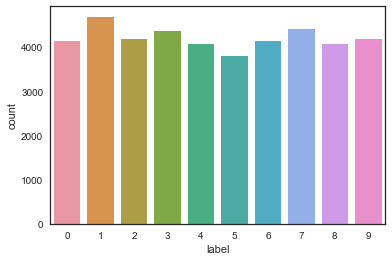

In [5]:
Y_train = train['label']
X_train = train.drop(labels=['label'], axis =1)

del train
g=sns.countplot(Y_train)
Y_train.value_counts()

In [6]:
#check data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
#normalization
X_train = X_train/255.0
test = test/255.0

In [10]:
X_train.shape

(42000, 784)

In [11]:
#reshape image
X_train = X_train.values.reshape(-1, 28, 28,1)
test = test.values.reshape(-1, 28, 28,1)

In [12]:
#Label encoding
Y_train = to_categorical(Y_train, num_classes=10)

In [13]:
random_seed =144
X_train, X_val, Y_train, Y_val =train_test_split(X_train, Y_train, test_size = 0.1, random_state =random_seed)

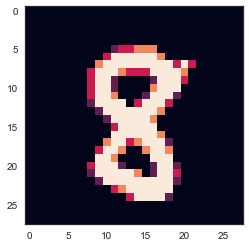

In [18]:
#show some examples
g = plt.imshow(X_val[0][:,:,0])


Keras Sequential API, where you have just to add one layer at a time, starting from the input.

In [30]:
#CNN model
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

In [31]:
#OPTIMIZER
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [32]:
#compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.


In [33]:
#set the learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [34]:
epochs =1
batch_size =86

In [45]:
#fit the model without the data augmentation
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val), verbose = 2)

ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, 1, 28, 28), kshp=(32, 1, 5, 5), filter_dilation=(1, 1)}(InplaceDimShuffle{0,3,1,2}.0, InplaceDimShuffle{3,2,0,1}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\theano\gof\opt.py", line 1982, in process_node
    replacements = lopt.transform(node)
  File "C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\theano\tensor\nnet\opt.py", line 615, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDN

AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?

In [38]:
#Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (37800, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [43]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, 1, 28, 28), kshp=(32, 1, 5, 5), filter_dilation=(1, 1)}(InplaceDimShuffle{0,3,1,2}.0, InplaceDimShuffle{3,2,0,1}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\theano\gof\opt.py", line 1982, in process_node
    replacements = lopt.transform(node)
  File "C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\theano\tensor\nnet\opt.py", line 615, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDN

AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?

In [ ]:
#Evaluate the model
#plot loss and accuracy for training and validation sets
fig, ax = plt.subplot(2,1)
ax[0].plot(history.history['loss'], color = 'b', label = "Traning loss")
ax[0].plot(history.history['val_loss'],color ='r', label="validation loss", axes=ax[0] )
legend = ax[0].legend(loc= "best", shadow =True)


ax[1].plot(history.history['acc'], color = 'b', label = "Traning loss")
ax[1].plot(history.history['val_acc'],color ='r', label="validation loss")
legend = ax[1]].legend(loc= "best", shadow =True)

In [ ]:
#confusion matrix
def plot_confusion_matrix(cm, classes, 
                         normaloze = False,
                         title ="Confusion Matrix",
                         cmap = plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)